Part 1 solution

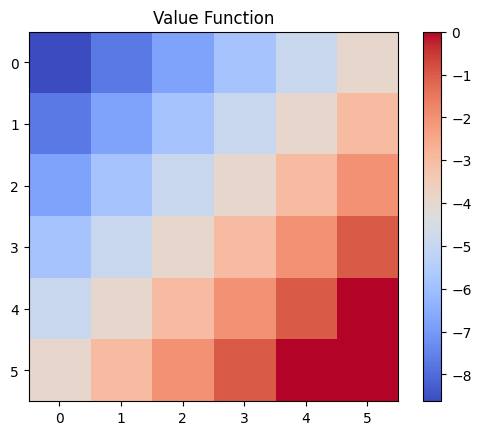

↓ ↓ → → ↓ ↓
↓ → ↓ → ↓ ↓
↓ ↓ ↓ ↓ ↓ ↓
↓ ↓ ↓ ↓ ↓ ↓
↓ ↓ ↓ ↓ → ↓
→ → → → → ↑
Total rewards for Q-learning: -9


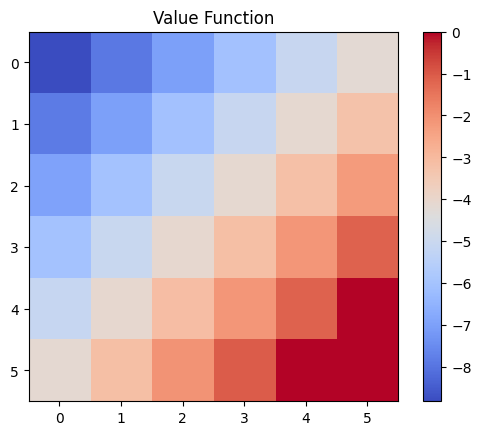

→ → → → ↓ ↓
↓ → → ↓ ↓ ↓
↓ ↓ ↓ ↓ → ↓
→ → ↓ ↓ → ↓
↓ → → ↓ → ↓
→ → → → → ↑
Total rewards for SARSA: -9


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the epsilon-greedy policy
def epsilon_greedy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(len(Q[state]))
    else:
        return np.argmax(Q[state])

# Define the Q-learning algorithm
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    Q = defaultdict(lambda: np.zeros(4))
    
    for episode in range(num_episodes):
        state = env.reset()
        
        while True:
            action = epsilon_greedy(Q, state, epsilon)
            next_state, reward, done = env.step(action)
            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])
            state = next_state
            
            if done:
                break
                
    return Q

# Define the environment (example)
class GridWorld:
    def __init__(self, size):
        self.size = size
        self.start_state = (0, 0)
        self.goal_state = (size - 1, size - 1)
        self.state = self.start_state

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0:  # up
            x = max(x - 1, 0)
        elif action == 1:  # right
            y = min(y + 1, self.size - 1)
        elif action == 2:  # down
            x = min(x + 1, self.size - 1)
        elif action == 3:  # left
            y = max(y - 1, 0)

        self.state = (x, y)
        reward = -1 if self.state != self.goal_state else 0
        done = self.state == self.goal_state
        return self.state, reward, done

# Initialize environment
env = GridWorld(6)

# Parameters
num_episodes = 1000
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Run Q-learning
Q_q_learning = q_learning(env, num_episodes, alpha, gamma, epsilon)

# Function to plot the value function
def plot_value_function(Q, env):
    V = np.zeros((env.size, env.size))
    for state in Q.keys():
        V[state] = np.max(Q[state])
    plt.imshow(V, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.title("Value Function")
    plt.show()

# Plot the value function learned by Q-learning
plot_value_function(Q_q_learning, env)

# Function to plot the policy
def plot_policy(Q, env):
    policy = np.zeros((env.size, env.size), dtype=int)
    for state in Q.keys():
        policy[state] = np.argmax(Q[state])
    
    action_symbols = {0: '↑', 1: '→', 2: '↓', 3: '←'}
    policy_symbols = np.vectorize(action_symbols.get)(policy)
    
    for row in policy_symbols:
        print(" ".join(row))

# Plot the policy learned by Q-learning
plot_policy(Q_q_learning, env)

# Function to calculate the sum of rewards over an episode
def calculate_rewards(Q, env):
    state = env.reset()
    total_reward = 0
    
    while True:
        action = np.argmax(Q[state])
        next_state, reward, done = env.step(action)
        total_reward += reward
        state = next_state
        
        if done:
            break
            
    return total_reward

# Calculate and print the sum of rewards for Q-learning
rewards_q_learning = calculate_rewards(Q_q_learning, env)
print(f"Total rewards for Q-learning: {rewards_q_learning}")

# Define the SARSA algorithm
def sarsa(env, num_episodes, alpha, gamma, epsilon):
    Q = defaultdict(lambda: np.zeros(4))
    
    for episode in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy(Q, state, epsilon)
        
        while True:
            next_state, reward, done = env.step(action)
            next_action = epsilon_greedy(Q, next_state, epsilon)
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            state, action = next_state, next_action
            
            if done:
                break
                
    return Q

# Run SARSA
Q_sarsa = sarsa(env, num_episodes, alpha, gamma, epsilon)

# Plot the value function learned by SARSA
plot_value_function(Q_sarsa, env)

# Plot the policy learned by SARSA
plot_policy(Q_sarsa, env)

# Calculate and print the sum of rewards for SARSA
rewards_sarsa = calculate_rewards(Q_sarsa, env)
print(f"Total rewards for SARSA: {rewards_sarsa}")


Part 2 solution

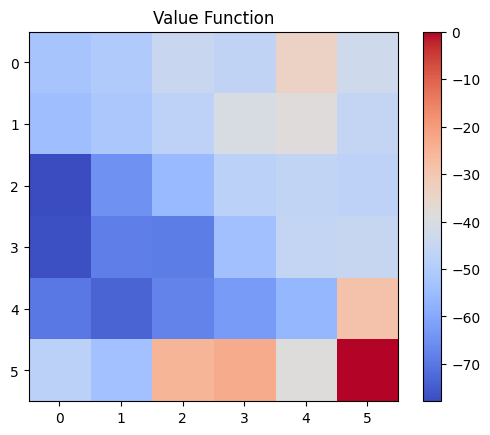

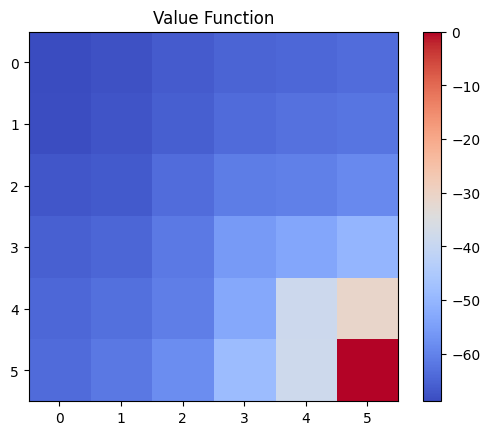

Theta values from Gradient Monte Carlo:
[[-52.52687411 -50.55858776 -44.43060182 -46.74283379 -33.78321567
  -43.01514789]
 [-54.14819276 -51.68655381 -47.20988019 -40.68236912 -38.38878812
  -45.63477351]
 [-77.86363312 -64.92400442 -55.59736452 -47.85100408 -46.4139638
  -47.15506016]
 [-76.99229812 -68.67752022 -68.83660672 -53.76993781 -45.82495304
  -45.30067176]
 [-69.95056886 -73.49963989 -67.68899605 -62.71698334 -56.27361345
  -28.62376319]
 [-48.05606413 -53.43755111 -25.48286406 -23.30696377 -38.76098676
    0.        ]]
Theta values from Semi-Gradient TD(0):
[[-68.82657526 -67.82151402 -66.35166289 -65.02172742 -64.25821265
  -63.61340792]
 [-68.33545959 -67.36482334 -65.65989308 -63.88688707 -62.8858713
  -62.21472418]
 [-67.11881378 -66.64453509 -63.47445769 -60.97409814 -60.26326261
  -58.65681299]
 [-65.57372537 -64.76240981 -61.55915185 -55.89107349 -53.48920141
  -50.23757499]
 [-64.43395799 -63.08383982 -60.75445082 -53.13305919 -38.55204553
  -31.00722574]
 [-63.871

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the environment (example)
class GridWorld:
    def __init__(self, size):
        self.size = size
        self.start_state = (0, 0)
        self.goal_state = (size - 1, size - 1)
        self.state = self.start_state

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0:  # up
            x = max(x - 1, 0)
        elif action == 1:  # right
            y = min(y + 1, self.size - 1)
        elif action == 2:  # down
            x = min(x + 1, self.size - 1)
        elif action == 3:  # left
            y = max(y - 1, 0)

        self.state = (x, y)
        reward = -1 if self.state != self.goal_state else 0
        done = self.state == self.goal_state
        return self.state, reward, done

# Initialize environment
env = GridWorld(6)

# Parameters
num_episodes = 1000
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Define the random walk policy
def random_walk_policy():
    return np.random.choice(4)

# Feature vector for state
def feature_vector(state, size):
    feature = np.zeros(size * size)
    feature[state[0] * size + state[1]] = 1
    return feature

# Gradient Monte Carlo method
def gradient_monte_carlo(env, num_episodes, alpha, gamma):
    size = env.size
    theta = np.zeros(size * size)
    
    for episode in range(num_episodes):
        state = env.reset()
        episode_data = []
        
        while True:
            action = random_walk_policy()
            next_state, reward, done = env.step(action)
            episode_data.append((state, reward))
            state = next_state
            
            if done:
                break
        
        G = 0
        for state, reward in reversed(episode_data):
            G = gamma * G + reward
            feature = feature_vector(state, size)
            theta += alpha * (G - np.dot(theta, feature)) * feature
    
    return theta

# Semi-gradient TD(0) method
def semi_gradient_td0(env, num_episodes, alpha, gamma):
    size = env.size
    theta = np.zeros(size * size)
    
    for episode in range(num_episodes):
        state = env.reset()
        
        while True:
            action = random_walk_policy()
            next_state, reward, done = env.step(action)
            feature = feature_vector(state, size)
            next_feature = feature_vector(next_state, size)
            td_error = reward + gamma * np.dot(theta, next_feature) - np.dot(theta, feature)
            theta += alpha * td_error * feature
            state = next_state
            
            if done:
                break
    
    return theta

# Function to plot the value function
def plot_value_function(theta, env):
    size = env.size
    V = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            state = (i, j)
            feature = feature_vector(state, size)
            V[state] = np.dot(theta, feature)
    plt.imshow(V, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.title("Value Function")
    plt.show()

# Run Gradient Monte Carlo
theta_mc = gradient_monte_carlo(env, num_episodes, alpha, gamma)
plot_value_function(theta_mc, env)

# Run Semi-Gradient TD(0)
theta_td0 = semi_gradient_td0(env, num_episodes, alpha, gamma)
plot_value_function(theta_td0, env)

# Compare the results
print("Theta values from Gradient Monte Carlo:")
print(theta_mc.reshape((env.size, env.size)))

print("Theta values from Semi-Gradient TD(0):")
print(theta_td0.reshape((env.size, env.size)))
